# Imports

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install vaderSentiment
import vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


# Loading and processing data

In [117]:
def process_data(data):
    '''Returns processed data'''
    # set the index with id to have a primary key
    data = data.set_index('uniqId')
    
    
    # take out not needed columns
    processed_data = data
    processed_data = processed_data.drop(columns=['Unnamed: 0', # we have already a better index
                                                  'ProductUrl', # the url is not needed since it is bound the product
                                                  'productTitle', # same with product Title
                                                  'productPrice', # same with price  
                                                  'reviewAuthor', # name has no correlation with prediction
                                                  'reviewAt', # date of review changes and is not useful for prediction
                                                  'certifiedBuyer', # not useful since all are certified
                                                  'scrapedAt', # not useful because has nothing to do with the review itself
                                                  'reviewerLocation', # not useful with this amount of data
                                                  'averageRating']) # not useful since all are the same value
    return processed_data

In [118]:
data = pd.read_csv('flipkart_review_data_2022_02.csv')
data = process_data(data)
data

,reviewTitle,reviewDescription,reviewLikes,reviewDislikes
uniqId,,,,
4e9df8d3-736c-5dae-b867-b92b7f09fc84,Excellent,Very good product,0,1
7ba04258-9f05-5642-ba33-8982db1f6c5e,Really Nice,Nice and super picture quality.and sound also ...,0,0
bfb20e97-eacf-5b76-a5eb-91999d6bd7a3,Super!,This is excellent picture qualityUltimate soun...,0,0
b659523f-96e2-50da-a1c0-13a65f410b6a,Just wow!,Nice,0,0
4876ae1b-4c7a-52a0-b5e0-dcf88efd1289,Highly recommended,Don't go with the negative reviews. Just go fo...,0,0
...,...,...,...,...
0d4001c2-e4ee-5b40-a390-f915b1f144f9,Nice product,Over all good ✌️🤩,0,0
ceeb6d10-2afc-5d45-ae5f-ffb5bf4ca0b0,Very Good,For watching OTT content the best tv compared ...,1,0
12c7d8e3-c655-5cfc-a8fa-36a97d75ce5c,Best in the market!,wow,1,0


# Splitting data

In [119]:
def split_data(data: pd.DataFrame, train_size: float=.8):
    '''Return split data into test and train given a size of train'''
    limit = int(len(data.index) * train_size)
    test = data.iloc[:limit,:]
    train = data.iloc[limit:,:]
    return test, train

train, test = split_data(data)

# Building sentimental analysis model

In [120]:
def get_prediction(*args: list):
    '''Return a prediction based on the title and the description of the review'''
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # make predictions
    predictions = []
    for sentence in args:
        sentiment_dict = sid_obj.polarity_scores(sentence)
        predictions.append(sentiment_dict['compound'])
    prediction = sum(predictions) / len(predictions)

    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return 'positive'
 
    elif sentiment_dict['compound'] <= - 0.05 :
        return 'negative'
    return 'neutral'

# Prediction function

In [121]:
data['prediction'] = data.apply(lambda row: get_prediction([row['reviewDescription'], row['reviewTitle'],]), axis=1)
data

,reviewTitle,reviewDescription,reviewLikes,reviewDislikes,prediction
uniqId,,,,,
4e9df8d3-736c-5dae-b867-b92b7f09fc84,Excellent,Very good product,0,1,positive
7ba04258-9f05-5642-ba33-8982db1f6c5e,Really Nice,Nice and super picture quality.and sound also ...,0,0,positive
bfb20e97-eacf-5b76-a5eb-91999d6bd7a3,Super!,This is excellent picture qualityUltimate soun...,0,0,positive
b659523f-96e2-50da-a1c0-13a65f410b6a,Just wow!,Nice,0,0,positive
4876ae1b-4c7a-52a0-b5e0-dcf88efd1289,Highly recommended,Don't go with the negative reviews. Just go fo...,0,0,positive
...,...,...,...,...,...
0d4001c2-e4ee-5b40-a390-f915b1f144f9,Nice product,Over all good ✌️🤩,0,0,positive
ceeb6d10-2afc-5d45-ae5f-ffb5bf4ca0b0,Very Good,For watching OTT content the best tv compared ...,1,0,positive
12c7d8e3-c655-5cfc-a8fa-36a97d75ce5c,Best in the market!,wow,1,0,neutral


# Data Visualization

Text(0, 0.5, 'amount of reviews')

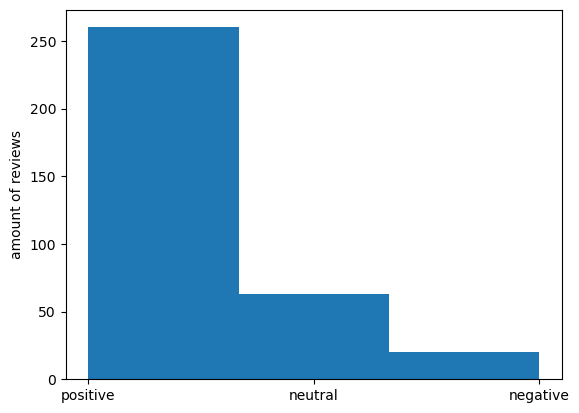

In [122]:
plt.hist(data.prediction, bins=3)
plt.ylabel('amount of reviews')

<AxesSubplot:>

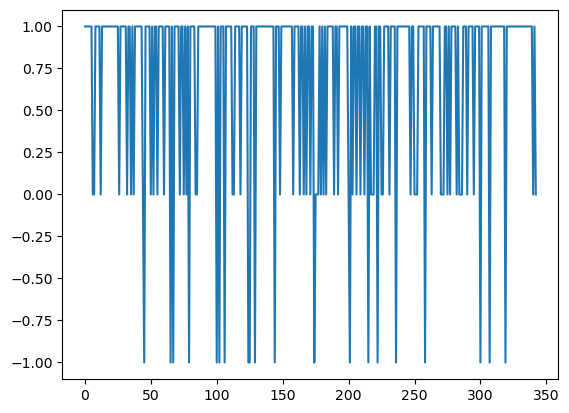

In [76]:
data.prediction.plot()

# Model performance analysis

## Positive

In [126]:
data[data['prediction'] == 'positive']

,reviewTitle,reviewDescription,reviewLikes,reviewDislikes,prediction
uniqId,,,,,
4e9df8d3-736c-5dae-b867-b92b7f09fc84,Excellent,Very good product,0,1,positive
7ba04258-9f05-5642-ba33-8982db1f6c5e,Really Nice,Nice and super picture quality.and sound also ...,0,0,positive
bfb20e97-eacf-5b76-a5eb-91999d6bd7a3,Super!,This is excellent picture qualityUltimate soun...,0,0,positive
b659523f-96e2-50da-a1c0-13a65f410b6a,Just wow!,Nice,0,0,positive
4876ae1b-4c7a-52a0-b5e0-dcf88efd1289,Highly recommended,Don't go with the negative reviews. Just go fo...,0,0,positive
...,...,...,...,...,...
0132f243-0d04-5504-9c60-b5e236a228c0,Awesome,Excellent Purchase from Flipkart .......Really...,1,0,positive
93e65aed-50de-5502-a381-be36c7d3ef05,Awesome,My review is after using 4months 1-sound quali...,1,0,positive
0d4001c2-e4ee-5b40-a390-f915b1f144f9,Nice product,Over all good ✌️🤩,0,0,positive


# Negative

In [131]:
data[data['prediction'] == 'negative']

,reviewTitle,reviewDescription,reviewLikes,reviewDislikes,prediction
uniqId,,,,,
a8ae788e-dd1a-5fe7-91c3-0017ab04d55f,Great product,Very Nice Video Quality. Good Sound. Good User...,0,0,negative
d5ec30b5-41f4-5317-925d-53be575248dc,Fair,"This is not qled.. Sound ok, connectivity prob...",2,1,negative
64fa1b3c-ae5e-5f09-9493-adeb8a41a54f,Hated it!,"Just imagine a TV with no physical buttons, st...",6,9,negative
54926695-9c26-54f6-93a3-1aeef528d8ad,Just okay,Viewing angles are bad. Colors start fading at...,1,1,negative
b80f9270-c7cc-5717-adb3-dc9890bed0cc,Fair,"This is not qled.. Sound ok, connectivity prob...",2,1,negative
f72f3a3e-4590-5223-b90f-b30407ef3fa4,Hated it!,"Just imagine a TV with no physical buttons, st...",6,9,negative
dbd4ad1b-f5ea-5401-b961-9d3002dc3ff3,Useless product,If you want better picture quality then this i...,60,17,negative
6f269c07-8e94-5fb7-850d-08716efcea18,Unsatisfactory,"facing connectivity problem, happens automatic...",4,0,negative
62984217-1e01-59fe-9700-a110acdf2ba7,Great product,Very Nice Video Quality. Good Sound. Good User...,0,0,negative
